In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as dt
import os
from os import path
import h5py
import re
from datetime import datetime
import requests

In [44]:
'''
Initialize variables
'''

#It can be left blank if the txt file is in the same path as the script
UNR_SITE_LIST_FILE = ''
folder_name = 'data'

lat = round(19.479,1)
lon = round(-155.602,1)

#Format yyyy-dd-MM
start_date = '2000-01-06'
end_date = '2022-01-07'

In [45]:
def date_to_decimal_year(date_str):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    year = date_obj.year
    day_of_year = date_obj.timetuple().tm_yday
    decimal_year = year + (day_of_year - 1) / 365.0
    decimal_year = round(decimal_year,2) 
    return decimal_year

In [46]:
def adapt_coordinates(lon, lat):

    if -179.95 <= lon <= 179.95:

        val = 0.5 if lon > 0 else  -0.5
        lon = lon*10 + val
        
    else:
        raise ValueError(f'Values not in the Interval (-179.5, 179.5)')
        
    if -89.95 <= lat <= 89.95:

        val = 0.5 if lat > 0 else -0.5
        lat = lat*10 + val

    else:
        raise ValueError(f'Values not in the Interval (-89.95, 89.95)')
        
    return lon, lat

In [47]:
def dload_site_list_hdf5(folder, path):
    '''
    Creates data folder
    '''
    if not folder:
        folder = 'data'
    
    if not os.path.exists(folder):
        os.mkdir(folder)

    '''
    Looks for list of links i.e. the only txt file in the current folder
    '''
    if not path:
    
        txt_files = [f for f in os.listdir('.') if f.endswith('.txt')]

        if len(txt_files) != 1:
            raise ValueError('should be only one txt file in the current directory')

        path = txt_files[0]

    '''
    Loop torough every line in the list of links .txt file and download every .HDF5 file within the list
    '''

    with open(path, "r") as ifile:
            for URL in ifile:
                if '.HDF5' in URL[-6:]:

                    d = re.search('\d{8}', URL)
                    d.group(0)
                    date = datetime.strptime(d.group(0), "%Y%d%m").date()

                    FILENAME = folder + '/'+ str(date) + '.HDF5'

                    if not os.path.exists(FILENAME):

                        result = requests.get(URL.strip())

                        try:
                            result.raise_for_status()
                            f = open(FILENAME,'wb')
                            f.write(result.content)
                            f.close()
                            print('contents of URL written to '+FILENAME)
                        except:
                            print('requests.get() returned an error code '+str(result.status_code))

                    else:
                        print(f'File: {FILENAME} already exists')
    return folder

In [48]:
def plot_precipitaion(longitude, latitude, start_date, end_date, folder, path):
        
        newdf = {}
        df = pd.DataFrame()
        dictionary = {}
    
        longitude, latitude = adapt_coordinates(longitude, latitude)

        sdate = datetime.strptime(start_date,'%Y-%d-%m')
        edate = datetime.strptime(end_date,'%Y-%d-%m')
        
        date_list = pd.date_range(start = sdate,end = edate).date
        
        if not folder:
            folder = 'data'

        '''
        Check if files date is in range with the input dates
        '''   
            
        if not os.path.exists(folder):
            folder = dload_site_list_hdf5(folder, path)
            
        else:
            
            sd = datetime.strptime(os.listdir(folder)[0].replace('.HDF5',''),'%Y-%d-%m').date()
            ed = datetime.strptime(os.listdir(folder)[-1].replace('.HDF5',''),'%Y-%d-%m').date()
            
            file_date_list = pd.date_range(start = sd,end = ed).date
            
            if not all(elem in file_date_list for elem in date_list):
                
                folder = dload_site_list_hdf5(folder, path)

        '''
        Loops trough every HDF5 file
        '''
        for f in os.listdir(folder):

            if f.endswith('.HDF5'):

                file = './' + folder + '/'+ f

                try:
                    
                    data = h5py.File(file,'r')
                    
                except:
                    
                    folder = dload_site_list_hdf5(folder, path)

                d = re.search('\d{4}[-]\d{2}[-]\d{2}', file)
                date = datetime.strptime(d.group(0), "%Y-%d-%m").date()

                if date in date_list:

                    dictionary[str(date)] = {}

                    lon = np.arange(-1799.5, 1800.5, 1)
                    lat = np.arange(-899.5,900.5,1)

                    for key in data.keys():        
                        pre = data[key]['precipitation']
                        lonPrec = dict(zip(lon, zip(*pre)))

                    lonPrec[longitude]

                    i = list(lat).index(latitude)
                    dictionary[str(date)] = lonPrec[longitude][0][i]

                    df1 = pd.DataFrame(dictionary.items(), columns=['Date', 'Precipitation'])
                    newdf = pd.concat([df,df1], ignore_index=True, sort=False)

                else: continue
                    
        return newdf  

In [49]:
newdf = plot_precipitaion(lon, lat, start_date, end_date, folder_name, '') 
newdf

File: data/2000-01-06.HDF5 already exists
File: data/2000-01-07.HDF5 already exists
File: data/2000-01-08.HDF5 already exists
File: data/2000-01-09.HDF5 already exists
File: data/2000-01-10.HDF5 already exists
File: data/2000-01-11.HDF5 already exists
File: data/2000-01-12.HDF5 already exists
File: data/2001-01-01.HDF5 already exists
File: data/2001-01-02.HDF5 already exists
File: data/2001-01-03.HDF5 already exists
File: data/2001-01-04.HDF5 already exists
File: data/2001-01-05.HDF5 already exists
File: data/2001-01-06.HDF5 already exists
File: data/2001-01-07.HDF5 already exists
File: data/2001-01-08.HDF5 already exists
File: data/2001-01-09.HDF5 already exists
File: data/2001-01-10.HDF5 already exists
File: data/2001-01-11.HDF5 already exists
File: data/2001-01-12.HDF5 already exists
File: data/2002-01-01.HDF5 already exists
File: data/2002-01-02.HDF5 already exists
File: data/2002-01-03.HDF5 already exists
File: data/2002-01-04.HDF5 already exists
File: data/2002-01-05.HDF5 already

,Date,Precipitation
0,2000-06-01,0.130028
1,2000-07-01,0.169866
2,2000-08-01,0.237104
3,2000-09-01,0.197136
4,2000-10-01,0.244288
...,...,...
251,2021-05-01,0.260530
252,2021-06-01,0.137766
253,2021-07-01,0.188075
254,2021-08-01,0.128166


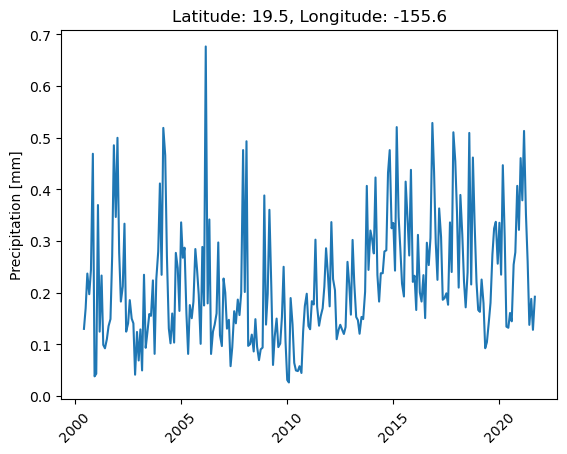

,Date,Precipitation,cum,Decimal_Year
0,2000-06-01,0.130028,0.130028,2000.42
1,2000-07-01,0.169866,0.299894,2000.50
2,2000-08-01,0.237104,0.536998,2000.58
3,2000-09-01,0.197136,0.734134,2000.67
4,2000-10-01,0.244288,0.978422,2000.75
...,...,...,...,...
251,2021-05-01,0.260530,56.233978,2021.33
252,2021-06-01,0.137766,56.371742,2021.41
253,2021-07-01,0.188075,56.559818,2021.50
254,2021-08-01,0.128166,56.687984,2021.58


In [50]:
# newdf["roll30"] = newdf.Precipitation.rolling(30).sum()
# newdf["roll90"] = newdf.Precipitation.rolling(90).sum()
# newdf["roll180"] = newdf.Precipitation.rolling(180).sum()

# newdf["log30"] = np.log(newdf.roll30)
# newdf["log90"] = np.log(newdf.roll90)
# newdf["log180"] = np.log(newdf.roll180)
# newdf['norm']=(newdf.Precipitation-newdf.Precipitation.min())/(newdf.Precipitation.max()-newdf.Precipitation.min())

newdf["cum"] = newdf.Precipitation.cumsum()

rainfalldfNoNull =newdf.dropna()

# Convert date strings to decimal years
rainfalldfNoNull['Decimal_Year'] = rainfalldfNoNull['Date'].apply(date_to_decimal_year)

# plt.plot(newdf.Date,newdf.Precipitation)
plt.plot(rainfalldfNoNull.Decimal_Year, rainfalldfNoNull.Precipitation)

# plt.plot(rainfalldfNoNull.Date, rainfalldfNoNull.Precipitation)
# Calculate intervals base on Dataframe dimension
# interval = round((newdf.shape[0]/100)*20)
# Invervals for x axes label
# plt.gca().xaxis.set_major_locator(dt.DayLocator(interval=interval))

plt.xticks(rotation=45)

#Set y label
plt.ylabel("Precipitation [mm]")

#Set title
plt.title(f'Latitude: {lat}, Longitude: {lon}')

# Data plot
plt.show()
rainfalldfNoNull

In [29]:
'''
Example of global precipitations given by Nasa at: https://gpm.nasa.gov/data/tutorials
'''

data = h5py.File(file,'r')
precip = data['/Grid/precipitation'][:]
precip = np.flip( precip[0,:,:].transpose(), axis=0 )
plt.imshow( precip, vmin=-1, vmax=2, extent=[-180,180,-90,90] )

# -- add a color bar
cbar = plt.colorbar( )
cbar.set_label('millimeters/hour')

# -- display lat/lon grid lines
for lon in np.arange(-90,90+1,90):
  dummy = plt.plot( (lon,lon), (-90,+90), color="black", linewidth=1 )

for lat in np.arange(-60,60+1,30):
  dummy = plt.plot( (-180,+180), (lat,lat), color="black", linewidth=1 )

NameError: name 'file' is not defined